# Homework 4

Submitted by: Pranav Sharma

Submission date: 6th October

**Instructions:** In this homework you will process and analyze a large data set that contains crimes reported in the city of Chicago from 2018 to February 2021.

To load the data set and get the *crimes* dataframe correctly configured, execute the cells with the code provided in this notebook by the instructor. This could take a few minutes after you start the execution of the code cells.

Once the *crimes* dataframe has been setup you could should proceed to obtain 3 meaningful data analysis results from processing the *crimes* dataframe. Four cells have been provided for you to describe the results of each of your data analysis procedures. You can add as many code cells as you want to complete each of your analysis and I also recommend that you add some explanatory cells (use Markdown cells) to provide some additional text with explanations of what you are doing.


In [4]:
#EXECUTE THIS CELL to setup the modules you need
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO

In [171]:
#EXECUTE THIS CELL to load the dataset into your environment - a security warning will appear. You can ignore it.
url="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/crimes_2018.csv"
csvdata=requests.get(url,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [172]:
#EXECUTE THIS CELL to setup the crimes dataframe with the data from dataset correctly formatted 
crimes=pd.read_csv(StringIO(csvdata),parse_dates=[0], index_col=[0])

# Code for data analysis 1

You can place the code for your first data analysis result in this section. Add as many code cells as you need.

In [173]:
#crimes.loc[:,'District':'Location'].head(5)

In [174]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766163 entries, 2018-09-01 00:01:00 to 2021-02-27 09:55:00
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    766163 non-null  int64  
 1   Case Number           766163 non-null  object 
 2   Block                 766163 non-null  object 
 3   IUCR                  766163 non-null  object 
 4   Primary Type          766163 non-null  object 
 5   Description           766163 non-null  object 
 6   Location Description  762688 non-null  object 
 7   Arrest                766163 non-null  bool   
 8   Domestic              766163 non-null  bool   
 9   Beat                  766163 non-null  int64  
 10  District              766163 non-null  float64
 11  Ward                  766133 non-null  float64
 12  Community Area        766162 non-null  float64
 13  FBI Code              766163 non-null  object 
 14  X Coordinate      

In [175]:
#crimes['Primary Type']

In [176]:
#crimes = crimes[].resample['h'].count()
Hourly_crimes = crimes['Primary Type'].resample('h').count()
Hourly_crimes.sort_index(inplace=True)
## Line 1
Hourly_crimes[(Hourly_crimes>100)==True].index

DatetimeIndex(['2018-01-01 00:00:00', '2018-06-01 00:00:00',
               '2018-07-01 00:00:00', '2019-01-01 00:00:00',
               '2020-01-01 00:00:00', '2020-05-31 00:00:00',
               '2020-05-31 14:00:00', '2020-05-31 15:00:00',
               '2020-05-31 16:00:00', '2020-05-31 17:00:00',
               '2020-05-31 20:00:00', '2020-05-31 21:00:00',
               '2020-05-31 22:00:00', '2020-05-31 23:00:00',
               '2021-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

<AxesSubplot:xlabel='Date'>

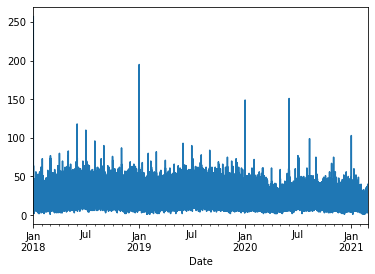

In [177]:
# Line 2
Hourly_crimes.plot()

<AxesSubplot:xlabel='Date'>

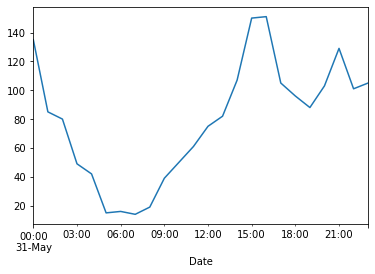

In [178]:
#Line 3
Hourly_crimes['2020-05-31'].plot()


In [179]:
Hourly_crimes[(Hourly_crimes>150)==True]

Date
2018-01-01 00:00:00    257
2019-01-01 00:00:00    195
2020-05-31 16:00:00    151
Name: Primary Type, dtype: int64

## Description of data analysis result 1

Use the next cell to describe your data analysis result 1

The thieves prefer doing there work duing new years time. The midnight time of the new year is the highest time when thievery happens. We can thus infer that due to the new year, it becomes easier for the robbers to do their work.
From Line 2 plot you can see that the crimes rate increaes every year in January
Apart from that, Every theive like to rob first of every month. Its the satirical equivalent to us waiting for our salary to be credited at the month's end. Like us, they plan and prefer to earn for the whole month in the beginning. 

If hypothetically we consider that if hourly crime rate is more than 100 then it is critical then on 31st May 2020, hourly crime rate increased more than 100 many times. The reason appears to be totally random since no other date other than 1st of every month showed increase in robbery. 

150 is too high a value to consider and doesn't give results signifying high crime rate times. 

# Code for data analysis 2

You can place the code for your second data analysis result in this section. Add as many code cells as you need.

In [180]:
arrest_req_cases=crimes[crimes['Arrest']==True]

In [181]:
arrest_req_cases_hourly = arrest_req_cases['ID'].resample('h').count()
arrest_req_cases['ID'].resample('h').count()

Date
2018-01-01 00:00:00    32
2018-01-01 01:00:00    11
2018-01-01 02:00:00    11
2018-01-01 03:00:00     7
2018-01-01 04:00:00     3
                       ..
2021-02-27 19:00:00     6
2021-02-27 20:00:00     7
2021-02-27 21:00:00     3
2021-02-27 22:00:00     6
2021-02-27 23:00:00     2
Freq: H, Name: ID, Length: 27696, dtype: int64

In [182]:
arrest_req_cases_hourly.sort_index(inplace=True)
arrest_req_cases_hourly.mean()


5.297335355285962

In [183]:
Hourly_crimes.mean()

27.663308781051416

In [184]:
ratio= arrest_req_cases_hourly.mean()/ Hourly_crimes.mean()
ratio

0.1914931940070194

We can infer from this ratio that for every 5 crimes commited per hour, the authorities are performing  1 arrest.

In [185]:
Hourly_crimes.max()

257

In [186]:
arrest_req_cases_hourly.max()

34

In [187]:
## Line 4
sum(arrest_req_cases_hourly['2020-06'])

2293

In [188]:
# line 5
sum(Hourly_crimes['2020-05-31'])

1897

<AxesSubplot:xlabel='Date'>

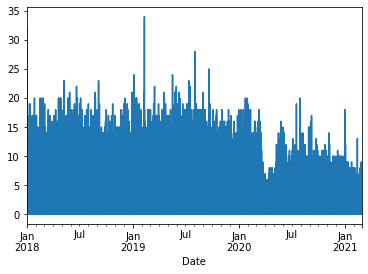

In [189]:
arrest_req_cases_hourly.plot()

<AxesSubplot:xlabel='Date'>

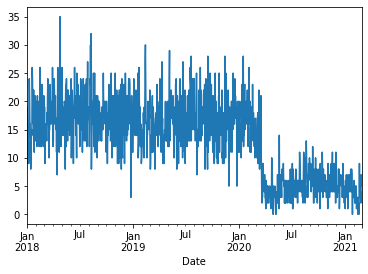

In [190]:
arrested_thefts=arrest_req_cases[arrest_req_cases['Primary Type']=='THEFT']
arrested_thefts_daily = arrested_thefts['ID'].resample('D').count()
arrested_thefts_daily.plot()

<AxesSubplot:xlabel='Date'>

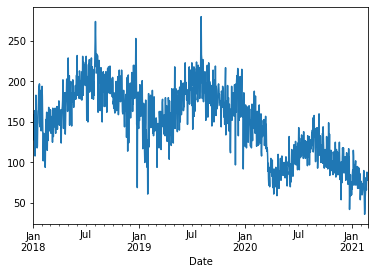

In [191]:
crimes_thefts = crimes[crimes['Primary Type']=='THEFT']
crimes_thefts_daily = crimes_thefts['ID'].resample('D').count()
crimes_thefts_daily.plot()

In [192]:
print(len(arrested_thefts[arrested_thefts['Year']== 2018]) , len(arrested_thefts[arrested_thefts['Year']== 2019]),
      len(arrested_thefts[arrested_thefts['Year']== 2020]) ,len(arrested_thefts[arrested_thefts['Year']== 2021]))

6339 6100 2769 239


In [193]:
ratio_thefts = arrested_thefts_daily.mean()/crimes_thefts_daily.mean()
ratio_thefts

0.08916892278030167

## Description of data analysis result 2

Use the next cell to describe your data analysis result 2

There are a lot of crimes that take place and the authorities are working relentlessly. It is quite significant that how many arrests are being done on an hourly basis. 

Extending from previous question, 31st May 2020 was the day when the crimes hourly reached more than 100 several times. On that day, 1897 were the total crimes that happened. Following that month, 2293 arrests were made. 
From 2018 we see a decrease in the number of arrests being made for Theft related issues. It is also because the number of crime incidents also decrease from the year 2020. Looking at the graphs plotted we can infer that the arrests made in theft related incident decreases by the same margin as the number of theft cases. 

Thus the ratio remains same i.e (1: 10) approximately where 1 being the number of arrest made per 10 cases of theft.



# Code for data analysis 3

You can place the code for your third data analysis result in this section. Add as many code cells as you need.

In [194]:
crimes_domestic = crimes[crimes['Domestic']==True]

In [195]:
crimes_domestic_children= crimes_domestic[crimes_domestic['IUCR']=='1710']

In [196]:
# number of case involving children
crimes_children = crimes[crimes['IUCR']=='1710']
len (crimes[crimes['IUCR']=='1710'])

1044

In [197]:
# number of case involving children which are domestic
len(crimes_domestic_children)

472

<AxesSubplot:xlabel='Date'>

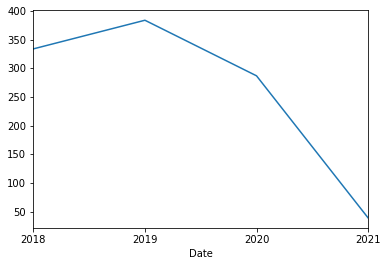

In [198]:
crimes_children_yearly = crimes_children['ID'].resample('y').count()
crimes_children_yearly.plot()

<AxesSubplot:xlabel='Date'>

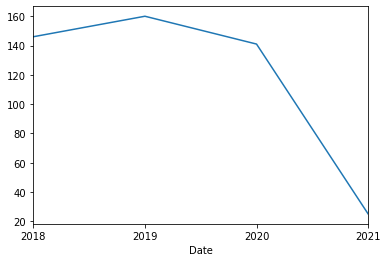

In [199]:
crimes_domestic_children_yearly = crimes_domestic_children['ID'].resample('y').count()
crimes_domestic_children_yearly.plot()

## Description of data analysis result 3

Use the next cell to describe your data analysis result 3

Out of 1044 crimes committed on children 472 occured due to domestic which is quite worrysome but the good news is that crimes involving children have sharply declined due to efforts from Police department. The year 2021 is not over but even then, the low numbers looks promising.

## Code of Data Analysis 4

Choose a primary type of crime and within that find when we know the location, When we know the location, is the arrest guarenteed?

In [200]:
primary_types_crimes = crimes['Primary Type'].drop_duplicates()
primary_types_crimes

Date
2018-09-01 00:01:00                                THEFT
2018-01-01 08:00:00                   DECEPTIVE PRACTICE
2018-12-20 16:00:00                        OTHER OFFENSE
2020-03-18 02:03:00                  MOTOR VEHICLE THEFT
2019-10-13 19:00:00                      CRIMINAL DAMAGE
2019-10-13 14:10:00                              ASSAULT
2019-10-13 00:05:00                              BATTERY
2020-03-18 17:35:00                            NARCOTICS
2019-10-13 08:15:00                    WEAPONS VIOLATION
2018-06-01 15:00:00           OFFENSE INVOLVING CHILDREN
2020-03-18 18:00:00                              ROBBERY
2019-10-13 05:00:00                    CRIMINAL TRESPASS
2018-11-27 20:43:00                 LIQUOR LAW VIOLATION
2019-10-13 20:30:00                             BURGLARY
2019-10-13 22:34:00     INTERFERENCE WITH PUBLIC OFFICER
2018-10-01 00:00:00                  CRIM SEXUAL ASSAULT
2019-10-13 21:47:00                                ARSON
2019-10-13 03:20:00       

In [201]:
crimes_assault=crimes[crimes['Primary Type']=='ASSAULT']
#2033 BEAT
#crimes_assault= crimes_assault.loc[:,'Description': 'Location Description'].reset_index(inplace=True)
location_vector= crimes_assault['Location'].reset_index()['Location']
location_vector[location_vector=='(41.975837637, -87.659853835)'].count()

2

In [210]:
crime_assault2 =crimes_assault.reset_index().loc[:,'Arrest':'Location']
crime_assault2.head(5)

,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,2033,20.0,47.0,3.0,08A,1167380.0,1934505.0,2019,10/20/2019 04:03:03 PM,41.975838,-87.659854,"(41.975837637, -87.659853835)"
1,False,False,2525,25.0,35.0,20.0,08A,1147996.0,1915240.0,2020,03/25/2020 03:47:29 PM,41.923369,-87.731634,"(41.923368973, -87.731633833)"
2,False,False,1811,18.0,43.0,7.0,08A,1169256.0,1915139.0,2019,10/20/2019 04:03:03 PM,41.922656,-87.653520,"(41.922655899, -87.653519985)"
3,True,False,1834,18.0,42.0,8.0,08A,1176668.0,1903135.0,2019,10/20/2019 04:03:03 PM,41.889552,-87.626650,"(41.889551923, -87.626649565)"
4,False,False,912,9.0,11.0,59.0,08A,NaN,NaN,2018,02/13/2018 03:58:53 PM,NaN,NaN,NaN


In [208]:
# for a given location , was the arrest made or not?
Crime_assault_location = crime_assault2[crime_assault2['Location']=='(41.931463882, -87.653819694)']
crime_arrest_true=crime_assault2[crime_assault2['Arrest']==True]
crime_arrest_true.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 3 to 61766
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrest          9660 non-null   bool   
 1   Domestic        9660 non-null   bool   
 2   Beat            9660 non-null   int64  
 3   District        9660 non-null   float64
 4   Ward            9660 non-null   float64
 5   Community Area  9660 non-null   float64
 6   FBI Code        9660 non-null   object 
 7   X Coordinate    9655 non-null   float64
 8   Y Coordinate    9655 non-null   float64
 9   Year            9660 non-null   int64  
 10  Updated On      9660 non-null   object 
 11  Latitude        9655 non-null   float64
 12  Longitude       9655 non-null   float64
 13  Location        9655 non-null   object 
dtypes: bool(2), float64(7), int64(2), object(3)
memory usage: 1000.0+ KB


In [205]:
crime_arrest_true['Location'].tail(40)
Crime_assault_location_nan = crime_arrest_true[crime_arrest_true['Location']==np.nan ]


In [204]:
len(Crime_assault_location_nan)

0

In [2]:
print( 'sdfsd'+ str(100))

sdfsd100


In [5]:
V = np.arrange(19).reshape((4,5))

AttributeError: module 'numpy' has no attribute 'arrange'

## Description of Data Analysis of result 4

For Assault primary crime type, Whenever the arrest was made, location value is present but location value can be present irrespective of the arrest status. One thing is definitive, when the location is absent then no arrest has been made. 